# From Montecarlo to Mean-and-Covariance Dynamics

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm as normal

__Univariate Normal Distribution__

The sample

$$X \sim N (\,\cdot\,;\,m,\,\sigma)$$

$X$ is the sample, $m$ is the mean, $\sigma$ is the dispersion.

$$
N(x;m,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-m)^2_{}}{2\sigma^2}\right]
$$

this is a PDF

$$
\int_{-\infty}^{\infty}N(x;m,\sigma)\,\mathrm{d}x=1
$$

Mean of a normal density distribution
$$
m = \int_{-\infty}^{\infty}x\,N(x;m,\sigma)\,\mathrm{d}x
$$

and its (co-)variance
$$
s = \int_{-\infty}^{\infty}(x-m)^2\,N(x;m,\sigma)\,\mathrm{d}x=\sigma^2
$$

Mean of the sample
$$
\mathrm{E}[X]=\frac{1}{N}\sum_i X_i^{}
$$

Covariance of the sample
$$
\mathrm{E}[(X-\mathrm{E}[X])^2]=\frac{1}{N-1}\sum_i (X_i^{}-\mathrm{E}[X])^2_{}
$$


mean X = 0.0004240729024051653
std  X = 0.10129160083913702


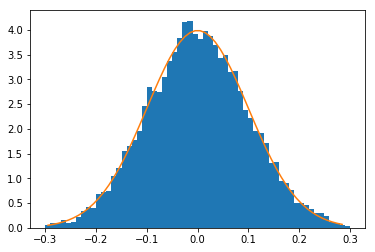

In [5]:
# SAMPLING UNIVARIATE GAUSSIAN

eps = 1e-12 # to include right end of arange

n = ___ # sample size

m = ___ # mean

s = ___ # (co)-variance

X = np.random.normal(m, np.sqrt(s), n) # sample the gaussian (note 1d wants the dispersion)

bins = np.arange(m-3*np.sqrt(s), m+3*np.sqrt(s)+eps, 0.1*np.sqrt(s)) # define the bins based on the distribution parameters

plt.hist(X, bins=bins, density=True)
plt.plot(0.5*(bins[0:-2]+bins[1:-1]), normal.pdf(0.5*(bins[0:-2]+bins[1:-1]), m, np.sqrt(s)))

print(f'mean X = {np.mean(X)}')
print(f'std  X = {np.std(X)}')


__Bivariate Normal Distribution Sample__

$$X \sim N (\,\cdot\,;\,m,\,s)$$

$X$ is the sample, $m=[m^x_{}, m^y_{}]$ is the mean, $s=[[s^{xx}_{}, s^{xy}_{}],[s^{xy}_{},s^{yy}_{}]]$ is the covariance.

Note that the covariance matrix must be symmetric, i.e. $s^T_{}=s$. For that it has only $\frac{d(d-1)}{2}$ independent components.

mean X = [ 0.00938608 -0.00393331]
cov X  = [[0.99254906 0.01164874]
 [0.01164874 1.0167077 ]]


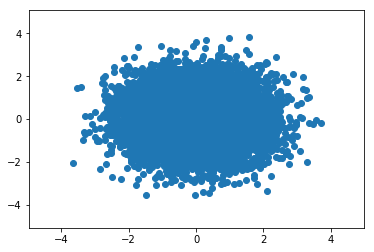

In [6]:
# SAMPLING BIVARIATE GAUSSIAN

n = ___  # sample size

m = np.array([___, ___]) # mean of the distribution

s = np.array([[___, ___], [___, ___]]) # covariance of the distribution

Q = np.random.multivariate_normal(m, s, n) # sample the normal distribution

mean = np.mean(Q, 0) # mean of the sample

cov = np.cov(Q.T) # covariance of the sample

plt.scatter(Q[:, 0], Q[:, 1]) # scatter plot
plt.xlim([mean[0]-5*cov[0, 0], mean[0]+5*cov[0, 0]])
plt.ylim([mean[1]-5*cov[1, 1], mean[1]+5*cov[1, 1]])

print(f'mean X = {mean}')
print(f'cov X  = {cov}')

(array([[  1.,   2.,   2.,   4.,   9.,   7.,  13.,   5.,   3.,   4.,   1.,
           0.],
        [  1.,   1.,   4.,   9.,  26.,  30.,  30.,  28.,  17.,   4.,   7.,
           1.],
        [  2.,   5.,  26.,  34.,  75.,  79.,  76.,  65.,  41.,  17.,  11.,
           1.],
        [  4.,   9.,  42.,  91., 133., 169., 177., 133.,  88.,  46.,  17.,
           4.],
        [  7.,  26.,  71., 142., 254., 286., 272., 221., 147.,  47.,  29.,
           9.],
        [  8.,  26.,  93., 193., 296., 355., 365., 266., 157.,  80.,  31.,
           5.],
        [  9.,  31.,  87., 156., 283., 375., 356., 272., 163.,  81.,  31.,
           9.],
        [  7.,  30.,  73., 143., 232., 291., 340., 227., 142.,  60.,  33.,
           9.],
        [  2.,  16.,  38.,  81., 143., 182., 170., 137.,  72.,  55.,  20.,
           4.],
        [  2.,  11.,  15.,  37.,  59.,  84.,  75.,  79.,  45.,  17.,   8.,
           2.],
        [  1.,   2.,   4.,  18.,  24.,  28.,  27.,  32.,  17.,   9.,   3.,
           4.],

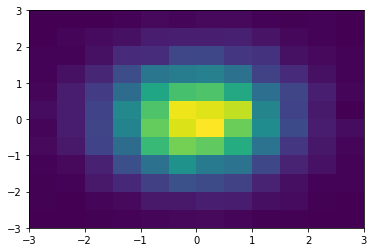

In [7]:
bins=[np.arange(___, ___+eps, ___), np.arange(___, ___+eps, ___)]
plt.hist2d(Q[:, 0], Q[:, 1], bins=bins) # density plot

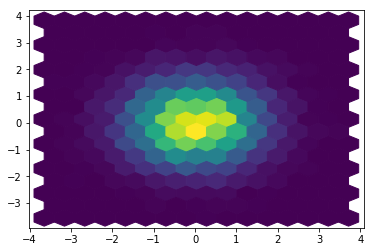

In [8]:
plt.hexbin(Q[:, 0], Q[:, 1], gridsize=15)

# Including Physics by Example(s)

__Harmonic Oscillator__
The pendulum has equation of motion

$$
\ddot{\theta}+\frac{g}{l}\,\sin(\theta)=0
$$

where $g=9.8\,\mathrm{m/s^2}$ is the gravity acceleration and $l$ is the length. The initial condition is

$$
\theta(0) = \theta_0^{}\,,\qquad \dot{\theta}(0) = \dot{\theta}_0^{}
$$

A widely studied situation is when $\theta\simeq 0$, that is the case of small oscillations.

$$
\sin(\theta)\simeq \theta
$$

and thus

$$
\ddot{\theta}+\frac{g}{l}\,\theta=0
$$

To implement this equation we consider the transformation to a first order system ($\theta=x_1^{}$, $\dot{\theta}=x_2^{}$, $g/l=1$)

$$
\dot{x}_1^{}=x_2^{}\\
\dot{x}_2^{}=-x_1^{}\\
$$

and the initial condition becomes

$$
x_1^{}=1\\
x_2^{}=0\\
$$


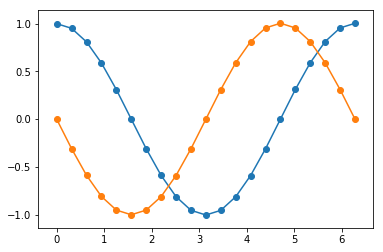

In [9]:
import scipy as sp

#INTEGRATION OF THE HARMONIC OSCILLATOR

t_span = [___, ___] # the whole range for integration
x0 = [___, ___] # the initial condition

# the drift
def f(t, x): return [x[1], -x[0]] # aka the velocity

# the event (here included for completeness)
def event(t, x): return t-___ # solve this for event(t, x)=0
event.terminal = True # is terminal?

# times to be stored
evaluation_times = np.linspace(0, ___, ___)

# which method 'RK45', 'RK23', 'Radau', 'BDF', 'LSODA'
integration_method = 'BDF'

# solve the ODE
solution = sp.integrate.solve_ivp(f, t_span, x0, method = integration_method,
                                  t_eval=evaluation_times, events=event)

plt.plot(solution.t, solution.y[0], '-') # plot the function
plt.scatter(solution.t, solution.y[0]) # sample times
plt.plot(solution.t, solution.y[1], '-') # and its derivative
plt.scatter(solution.t, solution.y[1]) # sample times

The damped harmonic oscillator is

$$
\ddot{x}+\alpha\dot{x}+x=0
$$

write the code for integrating this equation with an initial condition $x_1^{}=1$ and $x_2^{}=0$ with $\alpha=0.2$.

Hint: transform the 2nd-order equation to a 1-st order by using $x=x_1^{}$, $\dot{x}=x_2^{}$.

In [ ]:
# PUT THE CODE HERE!

# Physics and Statistics

__Stochastic ODE, Montecarlo simulations__

It is the Ito Process

$$
\dot{Q}=f(t, Q)+\sqrt{2}\sigma(t,Q)\cdot dW\\
Q(0)=Q_0^{}
$$

$Q$ is the collection of points in a space that represent the states and the parameters. $Q$ is build by sampling a normal distribution with given parameters.

Here the noise is not considered.

Elapsed time 42.06 sec


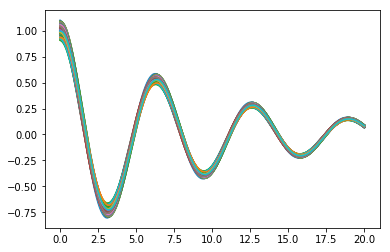

In [22]:
# INTEGRATION FOR A SWARM

from scipy.integrate import solve_ivp
from matplotlib.pyplot import plot as plot
from matplotlib.pyplot import show as show
import matplotlib.pyplot as plt
from numpy import linspace as linspace
from numpy.random import randn as random_normal
from timeit import default_timer as timer

n = ____ # number of samples (if not converged change this!)
every = 10 # plot solutions "every" samples

m = np.array([1., 0.])
s = np.array([[0.001, 0.], [0., 0.001]])

def f(t, x): return [x[1], ___] # damped harmonic oscillator

t_span = [0, 100] # time span

Q0 = np.random.multivariate_normal(m, s, n)

def event(t, x): return t-20 # event for stopping integration
event.terminal = True # event is terminal

evaluation_times = linspace(0, 100, 1001) # times to be stored

integration_method = 'RK45' # can be 'BDF' for stiff equations

#%% ODE solution for the sample X0

start = timer() # save time

result = [solve_ivp(f, t_span, q0, method=integration_method, t_eval=evaluation_times, events=event) for q0 in Q0] # solve with X0

end = timer() # save new time

elapsed_time = end-start # elapsed time

#%% performance
if elapsed_time > 1:
	print('Elapsed time %s sec' % str( round(end-start, 2) ) )
else:
	print('Elapsed time %s msec' % str( round((end-start)*1000, 2) ) )


#%% Plot the solution(s)
for i in range(0, n, every):
	plot(result[i].t, result[i].y[0], '-') # plot the function
show()

#%% end


(-1.5, 1.5)

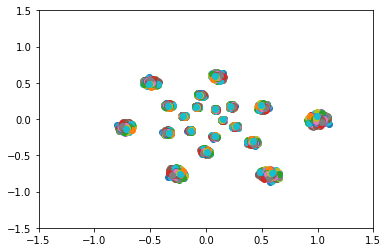

In [23]:
# PHASE SPACE PLOT FOR THE SWARM EVOLUTION
for i in range(0, n, every):
	plt.scatter(result[i].y[0][0:-1:10], result[i].y[1][0:-1:10]) # plot the function
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)


In [24]:
#STATISTICS FOR THE STORED SOLUTIONS
q1 = [np.mean([result[i].y[0][k] for i in range(n)]) for k in range(len(result[0].y[0]))]
q2 = [np.mean([result[i].y[1][k] for i in range(n)]) for k in range(len(result[0].y[1]))]
s11 = [np.std([result[i].y[0][k] for i in range(n)]) for k in range(len(result[0].y[0]))]
s22 = [np.std([result[i].y[1][k] for i in range(n)]) for k in range(len(result[0].y[1]))]

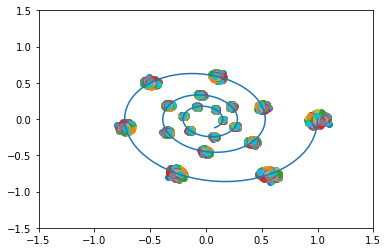

In [25]:
# DYNAMICS FOR THE MEAN
for i in range(0, n, every):
	plt.scatter(result[i].y[0][0:-1:10], result[i].y[1][0:-1:10]) # plot the function
plt.plot(q1, q2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()


In [26]:
# INTEGRATION FOR A GAUSSIAN

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# the degrees of fredom
#    [mx   my   sxx    syy    sxy]
w0 = [1.0, 0.0, 0.001, 0.001, 0.0]

def f(t, w): return [w[1], -w[0]-___*w[1], 2*w[4], -2*w[4]-2*___*w[3], -w[2]+w[3]-___*w[4]]

t_span = [0, 20]

evaluation_times = linspace(0, 20, 101) # times to be stored

integration_method = 'RK45' # can be 'BDF' for stiff equations

start = timer() # save time

mcd = solve_ivp(f, t_span, w0, method=integration_method, t_eval = evaluation_times)

end = timer() # save new time

#%% performance
if elapsed_time > 1:
	print('Elapsed time %s sec' % str( round(end-start, 2) ) )
else:
	print('Elapsed time %s msec' % str( round((end-start)*1000, 2) ) )


Elapsed time 0.01 sec


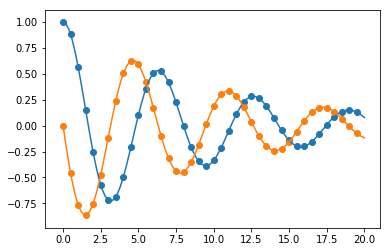

In [17]:
# plot the mean function and its derivative
plt.scatter(result[0].t[0:-1:5], q1[0:-1:5])
plt.plot(mcd.t, mcd.y[0])
plt.scatter(result[0].t[0:-1:5], q2[0:-1:5])
plt.plot(mcd.t, mcd.y[1])


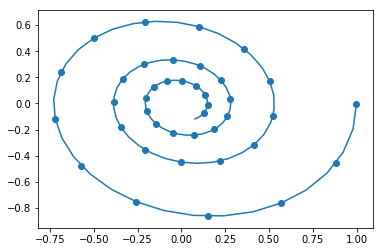

In [27]:
# plot the mean function and its derivative
plt.scatter(q1[0:-1:5], q2[0:-1:5])
plt.plot(mcd.y[0], mcd.y[1])


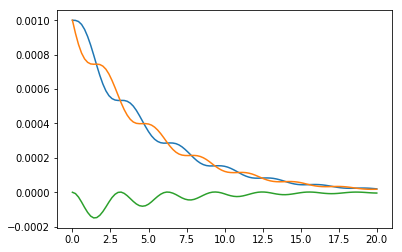

In [28]:
#plots the three components of the covariance matrix
plt.plot(mcd.t, mcd.y[2])
plt.plot(mcd.t, mcd.y[3])
plt.plot(mcd.t, mcd.y[4])


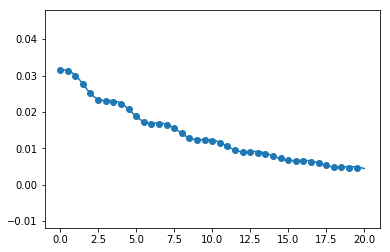

In [29]:
plt.scatter(result[i].t[0:-1:5], s11[0:-1:5])
plt.plot(mcd.t, np.sqrt(mcd.y[2]))


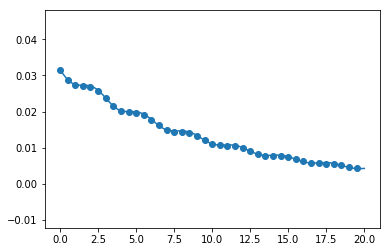

In [30]:
plt.scatter(result[i].t[0:-1:5], s22[0:-1:5])
plt.plot(mcd.t, np.sqrt(mcd.y[3]))

# Overshooting Probability

Let us consider the second order system

$$
\ddot{X}+A\,\dot{X}+X=1
$$

subjected to the initial conditions

$$
X(0) \sim N(\cdot\,;\,m^x,\sigma^x)\\
\dot{X}(0) \sim N(\cdot\,;\,m^{\dot{x}},\sigma^{\dot{x}})
$$

and uncertainty for the parameter $A$

$$
X \sim N(\cdot\,;\,m^\alpha,\sigma^\alpha)\\
$$

we want to compute the overshooting probability

Elapsed time 4.4 sec


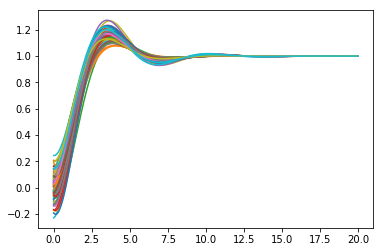

In [31]:
# OVERSHOOTING PROBABILITY: INTEGRATION FOR A SWARM

from scipy.integrate import solve_ivp
from matplotlib.pyplot import plot as plot
from matplotlib.pyplot import show as show
import matplotlib.pyplot as plt
from numpy import linspace as linspace
from numpy.random import randn as random_normal
from timeit import default_timer as timer

n = 1000 # number of samples
every = 10 # plot solutions "every" samples

m = np.array([0., 0., 1.])
s = np.array([[___**2, 0., 0.], [0., ___**2, 0.], [0., 0., ___**2]])

def f(t, x): return [x[1], 1-x[0]-x[2]*x[1], 0.] # uncertaintly damped harmonic oscillator

t_span = [0, 100] # time span

Q0 = np.random.multivariate_normal(m, s, n)

def event(t, x): return t-20 # event for stopping integration
event.terminal = True # event is terminal

evaluation_times = linspace(0, 100, 1001) # times to be stored

integration_method = 'RK45' # can be 'BDF' for stiff equations

#%% ODE solution for the sample X0

start = timer() # save time

result = [solve_ivp(f, t_span, q0, method = integration_method, t_eval=evaluation_times, events=event) for q0 in Q0] # solve with X0

end = timer() # save new time

elapsed_time = end-start # elapsed time

#%% performance
if elapsed_time > 1:
	print('Elapsed time %s sec' % str( round(end-start, 2) ) )
else:
	print('Elapsed time %s msec' % str( round((end-start)*1000, 2) ) )


#%% Plot the solution(s)
for i in range(0, n, every):
	plot(result[i].t, result[i].y[0], '-') # plot the function
show()

#%% end

In [32]:
# COMPUTE THE STATISTICS
q1 = [np.mean([result[i].y[0][k] for i in range(n)]) for k in range(len(result[0].y[0]))]
q2 = [np.mean([result[i].y[1][k] for i in range(n)]) for k in range(len(result[0].y[1]))]
s11 = [np.std([result[i].y[0][k] for i in range(n)]) for k in range(len(result[0].y[0]))]
s22 = [np.std([result[i].y[1][k] for i in range(n)]) for k in range(len(result[0].y[1]))]

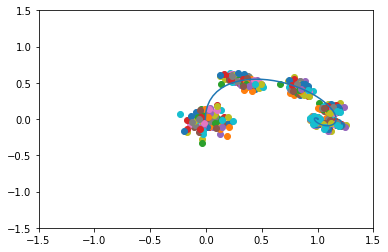

In [33]:
for i in range(0, n, every):
	plt.scatter(result[i].y[0][0:-1:10], result[i].y[1][0:-1:10]) # plot the function
plt.plot(q1, q2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()


In [34]:
# OVERSHOOTING PROBABILITY: INTEGRATION FOR A GAUSSIAN

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# the degrees of fredom
#    [mu   mv   ma  suu     svv     saa     suv sva sua]
#     w0   w1   w2  w3      w4      w5      w6  w7  w8
w0 = [0.0, 0.0, 1., ___**2, ___**2, ___**2, 0., 0., 0.]

def f(t, w): return [w[1],
                     1-w[0]-w[2]*w[1],
                     0., 
                     2*w[6],
                     -2*w[6]-2*w[2]*w[4]-2*w[1]*w[7],
                     0.,
                     -w[3]-w[2]*w[6]-w[1]*w[8]+w[4],
                     -w[8]-w[2]*w[7]-w[1]*w[5],
                     w[7]]

t_span = [0, 20]

evaluation_times = linspace(0, 20, 101) # times to be stored

integration_method = 'RK45' # can be 'BDF' for stiff equations

start = timer() # save time

mcd = solve_ivp(f, t_span, w0, method=integration_method, t_eval = evaluation_times)

end = timer() # save new time

#%% performance
if elapsed_time > 1:
	print('Elapsed time %s sec' % str( round(end-start, 2) ) )
else:
	print('Elapsed time %s msec' % str( round((end-start)*1000, 2) ) )


Elapsed time 0.01 sec


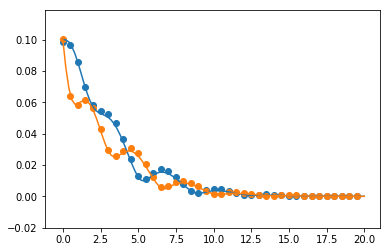

In [35]:
plt.scatter(result[i].t[0:-1:5], s11[0:-1:5])
plt.scatter(result[i].t[0:-1:5], s22[0:-1:5])

plt.plot(mcd.t, np.sqrt(mcd.y[3]))
plt.plot(mcd.t, np.sqrt(mcd.y[4]))


(0, 1)

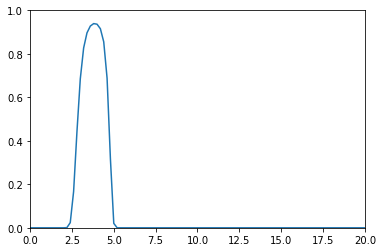

In [39]:
plt.plot(mcd.t, 1-normal.cdf(1.1, mcd.y[0], np.sqrt(mcd.y[3])))
plt.xlim(0, 20)
plt.ylim(0, 1)
